<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_G_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour

## MAT 421

## Module G: Numerical Integration

## Numerical Integration Problem Statement

### Introduction

The Numerical Integration Problem Statement introduces the concept of approximating integrals using numerical methods. Since finding exact solutions for integrals is often challenging or impossible in practical scenarios, numerical integration methods provide effective alternatives. The section explains that the integral of a function $f(x)$ over an interval $[a,b]$ can be estimated by dividing the interval into smaller subintervals. These subintervals are defined by a set of grid points, $x_0,x_1,...,x_n​$, where the spacing between points is $h=\frac{b−a}{n}$. The function values at these points are then used to approximate the area under the curve through various methods. Each method approximates the area over each subinterval using simple geometric shapes, such as rectangles or trapezoids, which are easier to compute. The following sections explore these methods in detail, including their accuracy and practical implementation.

### Python Implementation

The following code visualizes the concept of dividing an interval $[a,b]$ into smaller subintervals, which is essential for numerical integration methods. In this example, the interval $[0,\pi]$ is divided into 10 evenly spaced points. These points represent the grid points where function values will be evaluated in methods such as the Riemann Sum or Trapezoid Rule. The visualization highlights these points and shows how the interval is partitioned.

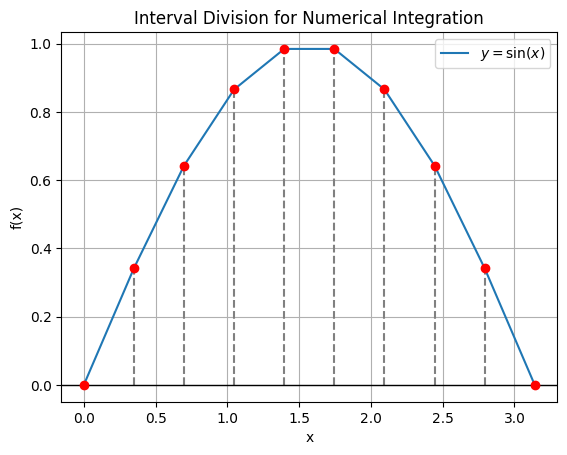

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and interval
a, b = 0, np.pi
n = 10  # Number of subintervals
x = np.linspace(a, b, n)  # Grid points
y = np.sin(x)  # Example function

# Plotting the function
plt.plot(x, y, label=r'$y = \sin(x)$')
plt.scatter(x, y, color='red', zorder=3)

# Mark grid points
for xi, yi in zip(x, y):
    plt.vlines(xi, 0, yi, colors='gray', linestyles='dashed')

# Labels and title
plt.title('Interval Division for Numerical Integration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

## Riemann’s Integral

### Introduction

The Riemann’s Integral method is a fundamental numerical integration technique that approximates the area under a curve by summing the areas of multiple rectangles. Each rectangle corresponds to a subinterval, with its width defined by the step size $h=\frac{b−a}{n}$​ and its height determined by the function value at a chosen point within the subinterval. There are three common variations of the Riemann Integral: Left Riemann Sum, Right Riemann Sum, and Midpoint Rule.

- The Left Riemann Sum uses the left endpoint of each subinterval for the rectangle's height, often underestimating the integral for increasing functions.
- The Right Riemann Sum uses the right endpoint, which can overestimate the result for increasing functions.
- The Midpoint Rule takes the function value at the midpoint of each subinterval, generally providing a more accurate approximation than the other two methods.

The Midpoint Rule achieves improved accuracy with an error of $O(h^2)$, making it a preferred method when higher precision is required.

### Python Implementation

The following code implements the Left Riemann Sum, Right Riemann Sum, and Midpoint Rule to approximate the integral of $sin(x)$ over the interval $[0,\pi]$. It calculates each approximation, compares them to the exact value of 2, and visualizes the methods to show how each one estimates the area under the curve.

Left Riemann Sum: 1.9835235375094546, Error: 0.01647646249054535
Right Riemann Sum: 1.9835235375094546, Error: 0.01647646249054535
Midpoint Rule: 2.0082484079079745, Error: -0.008248407907974542


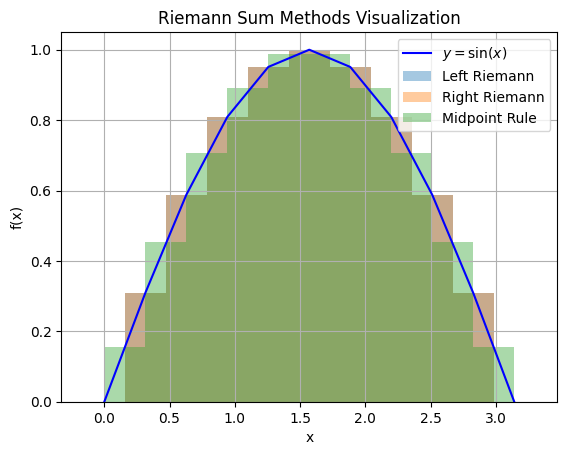

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and interval
def f(x):
    return np.sin(x)

a, b = 0, np.pi
n = 11  # Number of grid points
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)

# Left Riemann Sum
I_riemannL = h * sum(f(x[:-1]))

# Right Riemann Sum
I_riemannR = h * sum(f(x[1:]))

# Midpoint Rule
midpoints = (x[:-1] + x[1:]) / 2
I_mid = h * sum(f(midpoints))

# Exact integral value
exact_value = 2

# Display results
print(f"Left Riemann Sum: {I_riemannL}, Error: {exact_value - I_riemannL}")
print(f"Right Riemann Sum: {I_riemannR}, Error: {exact_value - I_riemannR}")
print(f"Midpoint Rule: {I_mid}, Error: {exact_value - I_mid}")

# Visualization
plt.plot(x, f(x), label=r'$y = \sin(x)$', color='blue')
plt.bar(x[:-1], f(x[:-1]), width=h, alpha=0.4, label='Left Riemann')
plt.bar(x[1:], f(x[1:]), width=-h, alpha=0.4, label='Right Riemann')
plt.bar(midpoints, f(midpoints), width=h, alpha=0.4, label='Midpoint Rule')

plt.title('Riemann Sum Methods Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Trapezoid Rule

### Introduction

The Trapezoid Rule is a numerical integration method that improves upon the Riemann Sum by approximating the area under a curve using trapezoids instead of rectangles. The interval $[a,b]$ is divided into nn subintervals, each with a width $h=\frac{b−a}{n}$​. For each subinterval, the area is calculated as the average of the function values at the left and right endpoints, multiplied by the step size. This method effectively fits a linear function between points, offering better accuracy than simple rectangle approximations.

The Trapezoid Rule is mathematically expressed as:

$$
I \approx h \sum_{i=0}^{n-1} \frac{f(x_i) + f(x_{i+1})}{2} + O(h^3)
$$

This formulation efficiently avoids redundant calculations by leveraging symmetry in the trapezoid heights. The Trapezoid Rule achieves an error of $O(h2)$, providing the same improved accuracy as the Midpoint Rule and making it a reliable method for numerical integration.

Geometrically, the Trapezoid Rule approximates the curve with straight lines connecting consecutive points, creating trapezoids whose combined areas closely approximate the true integral. This method is especially effective when the function is approximately linear over small intervals.


### Python Implementation

This code implements the Trapezoid Rule to approximate the integral of $sin⁡(x)$ over the interval $[0,π]$. It calculates the area by averaging the function values at the endpoints of each subinterval and multiplying by the step size. The code also compares the result to the exact value of $2$ and includes a visualization to illustrate how the trapezoids approximate the area under the curve.

Trapezoid Rule Approximation: 1.9835235375094549
Error: 0.01647646249054513


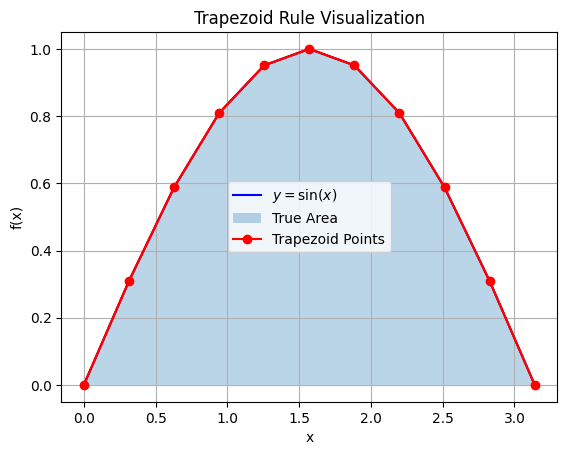

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and interval
def f(x):
    return np.sin(x)

a, b = 0, np.pi
n = 11  # Number of grid points
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)

# Trapezoid Rule Implementation
I_trap = h * np.sum((f(x[:-1]) + f(x[1:])) / 2)

# Exact integral value
exact_value = 2

# Display results
print(f"Trapezoid Rule Approximation: {I_trap}")
print(f"Error: {exact_value - I_trap}")

# Visualization
plt.plot(x, f(x), label=r'$y = \sin(x)$', color='blue')
plt.fill_between(x, f(x), alpha=0.3, label='True Area')
plt.plot(x, f(x), 'o-', color='red', label='Trapezoid Points')
for i in range(n-1):
    plt.plot([x[i], x[i+1]], [f(x[i]), f(x[i+1])], color='red')

plt.title('Trapezoid Rule Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()